<img src="../assets/cover_image.png" alt="cover" height="600" width="900"/>

<font size="20" color='blue'> Shadow Removal from Document Images using Traditional Approaches</font>

<font size="15" color = 'red'>Monsij Biswal $&$ Swetha Pillai</font>

<font size="10" color = 'red'> ECE-278A Class Project, W22</font>

<font size="15">Shadows - What exactly in numbers ?</font>

<font size="6" color='green'>**Definition**</font>

<font size="5"> Consider a shadow free image $J_c(\mathsf{x})$ and the corresponding input shadow image $I_c(\mathsf{x})$ for $c \in \{R,G,B\}$, where $\mathsf{x}$ and $c$ represent the pixel location and the three color channels respectively.</font>

<font size="5">$$I_c(\mathsf{x}) = S_c(\mathsf{x}) \:.\: J_c(\mathsf{x})$$</font>

<font size="6" color='green'>**Problem Statement**</font>

<font size="5">To estimate the shadow map $S_c(\mathsf{x})$. Note that $S_c(\mathsf{x})$ varies with the pixel location. </font>




<center><img src="../assets/example_op2.png" alt="example" height="600" width="900"/><center>

<font size="15">Shadow Map Estimation
    
<font size="6" color='green'>**Approach #1**</font>

<font size="5">$S_c(\mathsf{x})$ set to the ratio of local and global background colour.</font>
    
<font size="5">$$S_c(\mathsf{x}) = \frac{I_c^{local}(\mathsf{x})}{I_c^{global}(\mathsf{x})}$$</font>
    
<center><img src="../assets/local_global_bg.png" alt="example_bg" height="600" width="900"/><center>

In [1]:
# Imports packages and prepares for execution (RUN BEFOREHAND)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import color,filters,transform
from scipy import ndimage as ndi
from helper_functions import *
from tqdm import tqdm


base_img_rpath = '../dataset/document/'
base_img_wpath = '../output/document/'

#choices = 'document.png', 'color_mosaic.jpg', 'textbook.jpg', 'manuscript.jpg'
filename = 'manuscript.jpg'
doc = Image.open(base_img_rpath + filename)
doc_orig = np.array(doc)
#doc_orig = transform.rescale(doc_orig, scale= 0.25, channel_axis=2) #comment if req

is_0_255 = True   #applies suitable changes if pixel values are 0-255 (False > color_mosaic)


#plt.figure(figsize = (8,10))
#plt.imshow(doc_orig)
#plt.title('Original Image')
#plt.show()
ip_title = 'Original Image'
op_title = 'Estimated Global Background'

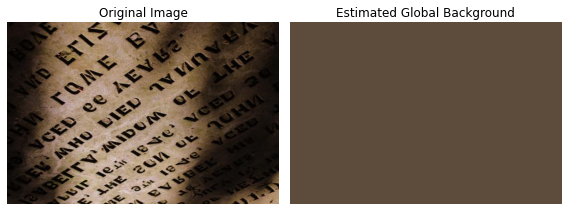

In [5]:
# Extracting global background colour

choice = 1

if choice==1:
    # Global average over each channel  (Approach #1)  
    I_global = get_global_colour_1(doc_orig,is_0_255)
elif choice==2:
    # Max pixel value for each channel  (Approach #2)
    I_global = get_global_colour_2(doc_orig,is_0_255)
elif choice==3:
    # Average of top 50 pixels          (Approach #3)
    I_global = get_global_colour_3(doc_orig,is_0_255)
f,ax = show_img_compare(doc_orig, I_global, ip_title, op_title)

In [ ]:
# Preliminary Estimation of Local Background

from skimage.filters.edges import convolve
p = 0.4  #p-percentile
block_size = 15  #block size (only odd) <-- parameter to be tuned
d = block_size//2


In [ ]:
# Refined Estimation of Local Background


for c_ch in range(3):  #loop for each color channel
    for row in tqdm(range(m)):
        for col in range(n):
            if I_local[row][col][c_ch] <= (1+t)*doc_orig[row][col][c_ch] and (1-t)*doc_orig[row][col][c_ch] <= I_local[row][col][c_ch]:
                I_local_refined[row][col][c_ch] = doc_orig[row][col][c_ch]
            else:
                I_local_refined[row][col][c_ch] = np.median(I_local[max(row-median_d,0):min(row+median_d+1,m-1),max(col-median_d,0):min(col+median_d+1,n-1),c_ch].flatten())

if is_0_255:
    I_local_refined = I_local_refined.astype(int) # check if this is needed or not

<font size="15">Shadow Map Estimation
    
<font size="6" color='green'>**Approach #2**</font>

<font size="15">Shadow Map Estimation
    
<font size="6" color='green'>**Approach #3**</font>

<font size="15">References</font>


<font color="blue" size="5">[1]</font> <font size="5">Wang, B. and Chen, C.P., 2019, September. An effective background estimation method for shadows removal of document images. In 2019 IEEE International Conference on Image Processing (ICIP) (pp. 3611-3615). IEEE.</font>

<font color="blue" size="5">[2]</font> <font size="5">Wang, J.R. and Chuang, Y.Y., 2020, May. Shadow removal of text document images by estimating local and global background colors. In ICASSP 2020-2020 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP) (pp. 1534-1538). IEEE.</font>

<font color="blue" size="5">[3]</font> <font size="5">Shah, V. and Gandhi, V., 2018, April. An iterative approach for shadow removal in document images. In 2018 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP) (pp. 1892-1896). IEEE.</font>
